In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | karakol
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | verdalsora
City not found. Skipping...
Processing Record 4 of Set 1 | ayr
Processing Record 5 of Set 1 | charters towers
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | russell
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | kandrian
Processing Record 11 of Set 1 | petatlan
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | narsaq
Processing Record 16 of Set 1 | konitsa
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | chifeng
Processing Record 21 of Set 1 | dongsheng
Processing Record 22

Processing Record 37 of Set 4 | chuy
Processing Record 38 of Set 4 | atambua
Processing Record 39 of Set 4 | muravlenko
Processing Record 40 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 4 | samarai
Processing Record 42 of Set 4 | moron
Processing Record 43 of Set 4 | mount isa
Processing Record 44 of Set 4 | colotlan
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | qinhuangdao
Processing Record 47 of Set 4 | eyl
Processing Record 48 of Set 4 | tura
Processing Record 49 of Set 4 | itarema
Processing Record 50 of Set 4 | dunedin
Processing Record 1 of Set 5 | dien bien
City not found. Skipping...
Processing Record 2 of Set 5 | saskylakh
Processing Record 3 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 4 of Set 5 | port keats
Processing Record 5 of Set 5 | babstovo
Processing Record 6 of Set 5 | hobyo
Processing Record 7 of Set 5 | vao
Processing Record 8 of Set 5 | chicama
Processing Record 9 of Set 5 | ribeira

Processing Record 27 of Set 8 | burgeo
Processing Record 28 of Set 8 | puerto escondido
Processing Record 29 of Set 8 | tual
Processing Record 30 of Set 8 | manacapuru
Processing Record 31 of Set 8 | mugur-aksy
Processing Record 32 of Set 8 | goderich
Processing Record 33 of Set 8 | phnum penh
City not found. Skipping...
Processing Record 34 of Set 8 | banikoara
Processing Record 35 of Set 8 | ampanihy
Processing Record 36 of Set 8 | cochrane
Processing Record 37 of Set 8 | swan hill
Processing Record 38 of Set 8 | kruisfontein
Processing Record 39 of Set 8 | ahipara
Processing Record 40 of Set 8 | touros
Processing Record 41 of Set 8 | esperance
Processing Record 42 of Set 8 | constantine
Processing Record 43 of Set 8 | aklavik
Processing Record 44 of Set 8 | moerai
Processing Record 45 of Set 8 | saravan
Processing Record 46 of Set 8 | loandjili
Processing Record 47 of Set 8 | berja
Processing Record 48 of Set 8 | bayir
Processing Record 49 of Set 8 | yeletskiy
City not found. Skippi

Processing Record 16 of Set 12 | conway
Processing Record 17 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 18 of Set 12 | san rafael
Processing Record 19 of Set 12 | asayita
City not found. Skipping...
Processing Record 20 of Set 12 | markova
Processing Record 21 of Set 12 | bay-khaak
Processing Record 22 of Set 12 | gushikawa
Processing Record 23 of Set 12 | amapa
Processing Record 24 of Set 12 | laguna
Processing Record 25 of Set 12 | akyab
Processing Record 26 of Set 12 | usinsk
Processing Record 27 of Set 12 | hanzhong
Processing Record 28 of Set 12 | bon air
Processing Record 29 of Set 12 | bac lieu
Processing Record 30 of Set 12 | burgos
Processing Record 31 of Set 12 | matara
Processing Record 32 of Set 12 | eureka
Processing Record 33 of Set 12 | dwarka
Processing Record 34 of Set 12 | bowen
Processing Record 35 of Set 12 | asyut
Processing Record 36 of Set 12 | pierre
Processing Record 37 of Set 12 | redmond
Processing Record 38 of Set 12 | urucara
Process

In [11]:
len(city_data)

595

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0          Karakol  42.49   78.39     41.25        59           0        3.53   
1      Yellowknife  62.46 -114.35     24.80        58          90       24.16   
2              Ayr  55.46   -4.63     57.20        71          40       11.41   
3  Charters Towers -20.10  146.27     65.50        82          35       14.05   
4       Bredasdorp -34.53   20.04     66.20        55           0       13.87   
5          Russell  32.35  -85.20     71.01        68           1        4.70   
6       Chokurdakh  70.63  147.92     20.48        98         100        3.91   
7          Rikitea -23.12 -134.97     73.63        78          22       17.96   
8         Kandrian  -6.22  149.55     75.00        82          85        3.27   
9         Petatlan  17.52 -101.27     86.00        66          40        4.63   

  Country                 Date  
0      KG  2020-10-14 15:36:27  
1      CA  2020-10-14 15:35:01  
2      GB  2020-10-14 15:36:27  
3      AU  2020-10-14 15:36:27  
4      ZA  2020-10-14 15:36:28  
5      US  2020-10-14 15:36:29  
6      RU  2020-10-14 15:36:29  
7      PF  2020-10-14 15:36:29  
8      PG  2020-10-14 15:36:29  
9      MX  2020-10-14 15:36:30

In [13]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.head()

City Country                 Date    Lat     Lng  Max Temp  \
0          Karakol      KG  2020-10-14 15:36:27  42.49   78.39     41.25   
1      Yellowknife      CA  2020-10-14 15:35:01  62.46 -114.35     24.80   
2              Ayr      GB  2020-10-14 15:36:27  55.46   -4.63     57.20   
3  Charters Towers      AU  2020-10-14 15:36:27 -20.10  146.27     65.50   
4       Bredasdorp      ZA  2020-10-14 15:36:28 -34.53   20.04     66.20   

   Humidity  Cloudiness  Wind Speed  
0        59           0        3.53  
1        58          90       24.16  
2        71          40       11.41  
3        82          35       14.05  
4        55           0       13.87

In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time

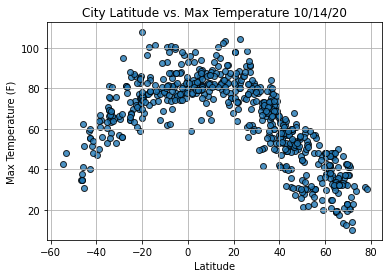

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

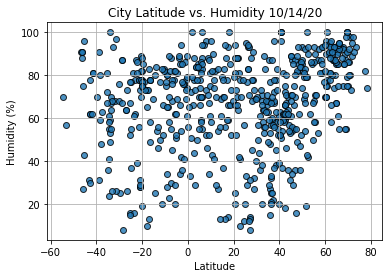

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [47]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print("R value is " + str(r_value))

In [29]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,20))

R value is -0.8705059483483172


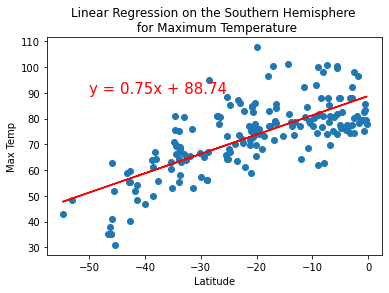

R value is 0.7217691675168759


In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % HUmidity', '% HUmidity',(55,20))

R value is 0.2665840877950787


In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))


R value is 0.042428296658506295


In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudniness',(55,20))

R value is 0.14096042078149756


In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))


R value is 0.17727895136660288


In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

R value is 0.09883745062494789


In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-30,25))

R value is -0.16145700174843272
